In [ ]:
import numpy as np
import pandas as pd

In [348]:
#The Pandas Series Object
#A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [350]:
pd.DataFrame(data)

,0
0,0.25
1,0.50
2,0.75
3,1.00


In [353]:
#As we see in the output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are simply a familiar NumPy array:
print(data.values)
pd.DataFrame(data.values)

[0.25 0.5  0.75 1.  ]


,0
0,0.25
1,0.50
2,0.75
3,1.00


In [355]:
#The index is an array-like object of type pd.Index, which we'll discuss in more detail momentarily.
print(data.index)
pd.DataFrame(data.index)

RangeIndex(start=0, stop=4, step=1)


,0
0,0
1,1
2,2
3,3


In [357]:
print(data)
print(data[1])

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
0.5


In [358]:
data[1:3]

1    0.50
2    0.75
dtype: float64

 Series as generalized NumPy array
#From what we've seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

#This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [360]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(data)
pd.DataFrame(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


,0
a,0.25
b,0.50
c,0.75
d,1.00


In [361]:
data['b']

0.5

In [362]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [363]:
data[5]

0.5

 Series as specialized dictionary
#In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

In [372]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)
print(pd.DataFrame(population_dict))
print(pd.DataFrame(population))

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


TypeError: __init__() got an unexpected keyword argument 'axis'

In [ ]:
#By default, a Series will be created where the index is drawn from the sorted keys. From here, typical dictionary-style item access can be performed:
population['California']

In [ ]:
#Unlike a dictionary, though, the Series also supports array-style operations such as slicing:
population['California':'Illinois']

Constructing Series objects
#We've already seen a few ways of constructing a Pandas Series from scratch; all of them are some version of the following:
#pd.Series(data, index=index)
#where index is an optional argument, and data can be one of many entities.

In [ ]:
## For example, data can be a list or NumPy array, in which case index defaults to an integer sequence:
pd.Series([2, 4, 6])

In [ ]:
pd.Series(5, index=[100, 200, 300])

In [ ]:
#data can be a dictionary, in which index defaults to the sorted dictionary keys:
pd.Series({2:'a', 1:'b', 3:'c'})

In [ ]:
#In each case, the index can be explicitly set if a different result is preferred:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
#Notice that in this case, the Series is populated only with the explicitly identified keys

#The Pandas DataFrame Object
#The next fundamental structure in Pandas is the DataFrame. Like the Series object discussed in the previous section, the DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary. We'll now take a look at each of these perspectives.

#DataFrame as a generalized NumPy array
#If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

#To demonstrate this, let's first construct a new Series listing the area of each of the five states discussed in the previous section:

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995,'Hyderabad':9999}
area = pd.Series(area_dict)
print(area)
print(population)

In [ ]:
#Now that we have this along with the population Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:
states = pd.DataFrame({'population': population,'area': area})
states

In [ ]:
states.index

In [ ]:
states.columns

 Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

DataFrame as specialized dictionary
Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [ ]:
states['area']

#Notice the potential point of confusion here: in a two-dimesnional NumPy array, data[0] will return the first row. For a DataFrame, data['col0'] will return the first column. Because of this, it is probably better to think about DataFrames as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful. We'll explore more flexible means of indexing DataFrames in Data Indexing and Selection.

#Constructing DataFrame objects
#A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series:

In [ ]:
population=pd.DataFrame(population, columns=['population'])
population

In [ ]:
# From a list of dicts
#Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
print(data)
pd.DataFrame(data)

In [ ]:
e=[]
for i in range(3):
    d={'a':i,'b':2*1}
    e.append(d)
print(e)

In [ ]:
#Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e., "not a number") values:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

In [ ]:
#From a dictionary of Series objects
#As we saw before, a DataFrame can be constructed from a dictionary of Series objects as well:
pd.DataFrame({'population': population,
              'area': area})

In [51]:
#From a two-dimensional NumPy array
#Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each:
a=np.random.rand(3,2)
print(a)
pd.DataFrame(a,
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

[[0.08551701 0.06913269]
 [0.41217357 0.39668042]
 [0.47808572 0.87474408]]


,foo,bar
a,0.085517,0.069133
b,0.412174,0.396680
c,0.478086,0.874744


In [48]:
# From a NumPy structured array
#We covered structured arrays in Structured Data: NumPy's Structured Arrays. A Pandas DataFrame operates much like a structured array, and can be created directly from one:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [49]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [50]:
#The Pandas Index Object
#We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multi-set, as Index objects may contain repeated values). Those views have some interesting consequences in the operations available on Index objects. As a simple example, let's construct an Index from a list of integers:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

Index as immutable array
The Index in many ways operates like an array. For example, we can use standard Python indexing notation to retrieve values or slices:

In [52]:
ind[1]

3

In [53]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [55]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [ ]:
ind[1] = 0
#This immutability makes it safer to share indices between multiple DataFrames and arrays, without the potential for side effects from inadvertent index modification.

#Index as ordered set
#Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic. The Index object follows many of the conventions used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [56]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [57]:
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [58]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [59]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [60]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

#Data Indexing and Selection
#In Chapter 2, we looked in detail at methods and tools to access, set, and modify values in NumPy arrays. These included indexing (e.g., arr[2, 1]), slicing (e.g., arr[:, 1:5]), masking (e.g., arr[arr > 0]), fancy indexing (e.g., arr[0, [1, 5]]), and combinations thereof (e.g., arr[:, [1, 5]]). Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. If you have used the NumPy patterns, the corresponding patterns in Pandas will feel very familiar, though there are a few quirks to be aware of.
#We'll start with the simple case of the one-dimensional Series object, and then move on to the more complicated two-dimesnional DataFrame object.

#Data Selection in Series
#As we saw in the previous section, a Series object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.
#Series as dictionary
#Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values:

In [61]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [62]:
'a' in data

True

In [63]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [66]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [ ]:
Series objects can even be modified with a dictionary-like #syntax. Just as you can extend a dictionary by assigning to a new key, you can extend a Series by assigning to a new index value:

In [67]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#This easy mutability of the objects is a convenient feature: under the hood, Pandas is making decisions about memory layout and data copying that might need to take place; the user generally does not need to worry about these issues.

In [69]:
#Series as one-dimensional array
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [70]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [72]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [74]:
(data>0.3) & (data<0.8)

a    False
b     True
c     True
d    False
e    False
dtype: bool

In [75]:
# fancy indexing
data[['a','e']]

a    0.25
e    1.25
dtype: float64

#Among these, slicing may be the source of the most confusion. Notice that when slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice, while when slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice.

#Indexers: loc, iloc, and ix
#These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.

In [76]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [77]:
# explicit index when indexing
data[1]

'a'

In [78]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

#Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series.
#First, the loc attribute allows indexing and slicing that always references the explicit index:

In [83]:
data

1    a
3    b
5    c
dtype: object

In [84]:
data.loc[1]

'a'

In [80]:
data.loc[1:3]

1    a
3    b
dtype: object

In [81]:
data.iloc[1]

'b'

In [82]:
data.iloc[1:3]

3    b
5    c
dtype: object

#A third indexing attribute, ix, is a hybrid of the two, and for Series objects is equivalent to standard []-based indexing. The purpose of the ix indexer will become more apparent in the context of DataFrame objects, which we will discuss in a moment.
#One guiding principle of Python code is that "explicit is better than implicit." The explicit nature of loc and iloc make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

#Data Selection in DataFrame
#Recall that a DataFrame acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of Series structures sharing the same index. These analogies can be helpful to keep in mind as we explore data selection within this structure.

#DataFrame as a dictionary
#The first analogy we will consider is the DataFrame as a dictionary of related Series objects. Let's return to our example of areas and populations of states:

In [86]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [87]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [88]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [89]:
data.area is data['area']

True

In [90]:
#Though this is a useful shorthand, keep in mind that it does not work for all cases! For example, if the column names are not strings, or if the column names conflict with methods of the DataFrame, this attribute-style access is not possible. For example, the DataFrame has a pop() method, so data.pop will point to this rather than the "pop" column:
data.pop is data['pop']
#In particular, you should avoid the temptation to try column assignment via attribute (i.e., use data['pop'] = z rather than data.pop = z).

#Like with the Series objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

False

In [91]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# DataFrame as two-dimensional array
#As mentioned previously, we can also view the DataFrame as an enhanced two-dimensional array. We can examine the raw underlying data array using the values attribute:

In [96]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
#With this picture in mind, many familiar array-like observations can be done on the DataFrame itself. For example, we can transpose the full DataFrame to swap rows and columns:

In [97]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
#When it comes to indexing of DataFrame objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array. In particular, passing a single index to an array accesses a row:

In [99]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [100]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [101]:
data['area'][0]

423967

In [106]:
data.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [107]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [108]:
data.ix[:3, :'pop']

C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [ ]:
#Keep in mind that for integer indices, the ix indexer is subject to the same potential sources of confusion as discussed for integer-indexed Series objects.

#Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the loc indexer we can combine masking and fancy indexing as in the following:

In [111]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [112]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [113]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [118]:
data.iloc[1:3,2:3]

,density
Texas,38.018740
New York,139.076746


In [119]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [120]:
#Ufuncs: Index Preservation
# Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects. Let's start by defining a simple Series and DataFrame on which to demonstrate this:

In [121]:
import pandas as pd
import numpy as np

In [125]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10,4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [126]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [127]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [133]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [134]:
#UFuncs: Index Alignment

In [ ]:
#For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

In [ ]:
#Index alignment in Series
#As an example, suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population:

In [135]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [136]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [137]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [156]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [157]:
A.add(B, fill_value=1)

0    3.0
1    5.0
2    9.0
3    6.0
dtype: float64

In [ ]:
# Index alignment in DataFrame
# A similar type of alignment takes place for both columns and indices when performing operations on DataFrames:

In [159]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,19,2
1,4,18


In [160]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,6,4,8
1,6,1,3
2,8,1,9


In [161]:
A+B

,A,B,C
0,23.0,8.0,NaN
1,5.0,24.0,NaN
2,NaN,NaN,NaN


In [162]:
fill = A.stack().mean()
print(fill)
A.add(B, fill_value=0)

10.75


,A,B,C
0,23.0,8.0,8.0
1,5.0,24.0,3.0
2,1.0,8.0,9.0


In [ ]:
#Python Operator	Pandas Method(s)
#+	add()
#-	sub(), subtract()
#*	mul(), multiply()
#/	truediv(), div(), divide()
#//	floordiv()
#%	mod()
#**	pow()

In [163]:
# Ufuncs: Operations Between DataFrame and Series

In [164]:
#When performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [165]:
A = rng.randint(10, size=(3, 4))
A

array([[8, 9, 4, 1],
       [3, 6, 7, 2],
       [0, 3, 1, 7]])

In [166]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-5, -3,  3,  1],
       [-8, -6, -3,  6]])

In [170]:
df = pd.DataFrame(A, columns=list('QRST'))
print(df)
df - df.iloc[0]

   Q  R  S  T
0  8  9  4  1
1  3  6  7  2
2  0  3  1  7


,Q,R,S,T
0,0,0,0,0
1,-5,-3,3,1
2,-8,-6,-3,6


In [171]:
df.add(df['R'], axis=0)

,Q,R,S,T
0,17,18,13,10
1,9,12,13,8
2,3,6,4,10


In [169]:
df['R']

0    9
1    6
2    3
Name: R, dtype: int32

In [172]:
halfrow = df.iloc[0, ::2]
halfrow

Q    8
S    4
Name: 0, dtype: int32

In [180]:
print(df)
df.subtract(halfrow,axis=1)

   Q  R  S  T
0  8  9  4  1
1  3  6  7  2
2  0  3  1  7


,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-5.0,NaN,3.0,NaN
2,-8.0,NaN,-3.0,NaN


In [ ]:
# Handling Missing Data
#The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. To make matters even more complicated, different data sources may indicate missing data in different ways.

#In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python. Here and throughout the book, we'll refer to missing data in general as null, NaN, or NA values.

In [181]:
#Pythonic missing data

In [ ]:
# The first sentinel value used by Pandas is None, a Python singleton object that is often used for missing data in Python code. Because it is a Python object, None cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object' (i.e., arrays of Python objects):

In [182]:
import numpy as np
import pandas as pd

In [183]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [185]:
vals1.dtype

dtype('O')

In [186]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
123 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
4.82 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [ ]:
#The use of Python objects in an array also means that if you perform aggregations like sum() or min() across an array with a None value, you will generally get an error:

In [ ]:
vals1.sum() ## Will result in a error as there a none value

In [188]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [191]:
1 + np.nan

nan

In [190]:
0 *  np.nan

nan

In [192]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [193]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [194]:
#Keep in mind that NaN is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

In [195]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [196]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [197]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [ ]:
#Typeclass	Conversion When Storing NAs	NA Sentinel Value
#floating	No change	np.nan
#object	No change	None or np.nan
#integer	Cast to float64	np.nan
#boolean	Cast to object	None or np.nan

In [201]:
x = pd.Series(range(2), dtype=boolean)
x

NameError: name 'boolean' is not defined

In [199]:
x[0]=None

In [200]:
x

0    None
1       1
dtype: object

Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

isnull(): Generate a boolean mask indicating missing values
notnull(): Opposite of isnull()
dropna(): Return a filtered version of the data
fillna(): Return a copy of the data with missing values filled or imputed
We will conclude this section with a brief exploration and demonstration of these routines.

Detecting null values
Pandas data structures have two useful methods for detecting null data: isnull() and notnull(). Either one will return a Boolean mask over the data. For example:

In [203]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [204]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [205]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [206]:
data.dropna()

0        1
2    hello
dtype: object

In [209]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [208]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [232]:
df[df[0].isnull()]

,0,1,2,3
2,NaN,4.0,6,NaN


In [214]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [215]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [216]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [217]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Filling null values
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the isnull() method as a mask, but because it is such a common operation Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

Consider the following Series:

In [218]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [219]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [220]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [221]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For DataFrames, the options are similar, but we can also specify an axis along which the fills take place:

In [222]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [228]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains.

Hierarchical Indexing
< Handling Missing Data | Contents | Combining Datasets: Concat and Append >

Up to this point we've been focused primarily on one-dimensional and two-dimensional data, stored in Pandas Series and DataFrame objects, respectively. Often it is useful to go beyond this and store higher-dimensional data–that is, data indexed by more than one or two keys. While Pandas does provide Panel and Panel4D objects that natively handle three-dimensional and four-dimensional data (see Aside: Panel Data), a far more common pattern in practice is to make use of hierarchical indexing (also known as multi-indexing) to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional Series and two-dimensional DataFrame objects.

In this section, we'll explore the direct creation of MultiIndex objects, considerations when indexing, slicing, and computing statistics across multiply indexed data, and useful routines for converting between simple and hierarchically indexed representations of your data.

We begin with the standard imports:

In [233]:
import pandas as pd
import numpy as np

A Multiply Indexed Series
Let's start by considering how we might represent two-dimensional data within a one-dimensional Series. For concreteness, we will consider a series of data where each point has a character and numerical key.

The bad way¶
Suppose you would like to track data about states from two different years. Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys:

In [234]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [235]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen:

In [236]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

This produces the desired result, but is not as clean (or as efficient for large datasets) as the slicing syntax we've grown to love in Pandas.

The Better Way: Pandas MultiIndex¶
Fortunately, Pandas provides a better way. Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas MultiIndex type gives us the type of operations we wish to have. We can create a multi-index from the tuples as follows:

In [237]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

Combining Datasets: Concat and Append
    Some of the most interesting studies of data come from combining different data sources. These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets. Series and DataFrames are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of Series and DataFrames with the pd.concat function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

We begin with the standard imports:

In [238]:
import pandas as pd
import numpy as np

For convenience, we'll define this function which creates a DataFrame of a particular form that will be useful below:

In [239]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [240]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

Recall: Concatenation of NumPy Arrays
Concatenation of Series and DataFrame objects is very similar to concatenation of Numpy arrays, which can be done via the np.concatenate function as discussed in The Basics of NumPy Arrays. Recall that with it, you can combine the contents of two or more arrays into a single array:

In [243]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z],axis=0)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [244]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

Simple Concatenation with pd.concat
Pandas has a function, pd.concat(), which has a similar syntax to np.concatenate but contains a number of options that we'll discuss momentarily:

In [245]:
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

NameError: name 'objs' is not defined

pd.concat() can be used for a simple concatenation of Series or DataFrame objects, just as np.concatenate() can be used for simple concatenations of arrays:

In [247]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [248]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


By default, the concatenation takes place row-wise within the DataFrame (i.e., axis=0). Like np.concatenate, pd.concat allows specification of an axis along which concatenation will take place. Consider the following example:

In [256]:
df3 = make_df('ABE', [0, 1])
df4 = make_df('CD', [0,1])
display('df3', 'df4', "pd.concat([df3, df4], axis=0)","pd.concat([df3, df4], axis=1)")


C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


df3
    A   B   E
0  A0  B0  E0
1  A1  B1  E1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=0)
     A    B    C    D    E
0   A0   B0  NaN  NaN   E0
1   A1   B1  NaN  NaN   E1
0  NaN  NaN   C0   D0  NaN
1  NaN  NaN   C1   D1  NaN

pd.concat([df3, df4], axis=1)
    A   B   E   C   D
0  A0  B0  E0  C0  D0
1  A1  B1  E1  C1  D1

Duplicate indices¶
One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices, even if the result will have duplicate indices! Consider this simple example:

In [257]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [258]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [259]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

Concatenation with joins¶
In the simple examples we just looked at, we were mainly concatenating DataFrames with shared column names. In practice, data from different sources might have different sets of column names, and pd.concat offers several options in this case. Consider the concatenation of the following two DataFrames, which have some (but not all!) columns in common:

In [265]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

C:\Users\Prudhvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [261]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Another option is to directly specify the index of the remaininig colums using the join_axes argument, which takes a list of index objects. Here we'll specify that the returned columns should be the same as those of the first input:

In [262]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [263]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


The append() method¶
Because direct array concatenation is so common, Series and DataFrame objects have an append method that can accomplish the same thing in fewer keystrokes. For example, rather than calling pd.concat([df1, df2]), you can simply call df1.append(df2):

In [266]:
display('df5', 'df6', 'df1.append(df2)')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

df1.append(df2)
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4

Keep in mind that unlike the append() and extend() methods of Python lists, the append() method in Pandas does not modify the original object–instead it creates a new object with the combined data. It also is not a very efficient method, because it involves creation of a new index and data buffer. Thus, if you plan to do multiple append operations, it is generally better to build a list of DataFrames and pass them all at once to the concat() function.

In the next section, we'll look at another more powerful approach to combining data from multiple sources, the database-style merges/joins implemented in pd.merge. For more information on concat(), append(), and related functionality, see the "Merge, Join, and Concatenate" section of the Pandas documentation.

Combining Datasets: Merge and Join
< Combining Datasets: Concat and Append | Contents | Aggregation and Grouping >

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations. If you have ever worked with databases, you should be familiar with this type of data interaction. The main interface for this is the pd.merge function, and we'll see few examples of how this can work in practice.

For convenience, we will start by redefining the display() functionality from the previous section:

In [267]:
import pandas as pd
import numpy as np

Relational Algebra¶
The behavior implemented in pd.merge() is a subset of what is known as relational algebra, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases. The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset. With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the pd.merge() function and the related join() method of Series and Dataframes. As we will see, these let you efficiently link data from different sources.

Categories of Joins
The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins. All three types of joins are accessed via an identical call to the pd.merge() interface; the type of join performed depends on the form of the input data. Here we will show simple examples of the three types of merges, and discuss detailed options further below.

One-to-one joins
Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation seen in Combining Datasets: Concat & Append. As a concrete example, consider the following two DataFrames which contain information on several employees in a company:

In [276]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue','Prudhvi'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR','Data Scientist']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Prudhvi,Data Scientist
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [277]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The pd.merge() function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key. The result of the merge is a new DataFrame that combines the information from the two inputs. Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between df1 and df2, and the pd.merge() function correctly accounts for this. Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the left_index and right_index keywords, discussed momentarily).

Many-to-one joins
Many-to-one joins are joins in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. Consider the following example of a many-to-one join:

In [278]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting DataFrame has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

Many-to-many joins
Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined. If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge. This will be perhaps most clear with a concrete example. Consider the following, where we have a DataFrame showing one or more skills associated with a particular group. By performing a many-to-many join, we can recover the skills associated with any individual person:

In [280]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Prudhvi,Data Scientist
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


These three types of joins can be used with other Pandas tools to implement a wide array of functionality. But in practice, datasets are rarely as clean as the one we're working with here. In the following section we'll consider some of the options provided by pd.merge() that enable you to tune how the join operations work.

Specification of the Merge Key
We've already seen the default behavior of pd.merge(): it looks for one or more matching column names between the two inputs, and uses this as the key. However, often the column names will not match so nicely, and pd.merge() provides a variety of options for handling this.

The on keyword
Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names:

In [281]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Prudhvi,Data Scientist
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


The left_on and right_on keywords
At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee". In this case, we can use the left_on and right_on keywords to specify the two column names:

In [284]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Prudhvi,Data Scientist
,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [285]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


The left_index and right_index keywords
Sometimes, rather than merging on a column, you would instead like to merge on an index. For example, your data might look like this:

In [287]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1','df2','df1a', 'df2a')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Prudhvi,Data Scientist
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


You can use the index as the key for merging by specifying the left_index and/or right_index flags in pd.merge():

In [288]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
Prudhvi,Data Scientist
,hire_date
employee,
Lisa,2004
Bob,2008


For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices:

In [290]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
Prudhvi,Data Scientist
,hire_date
employee,
Lisa,2004
Bob,2008


If you'd like to mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behavior:

In [297]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                   group
employee                
Bob           Accounting
Jake         Engineering
Lisa         Engineering
Sue                   HR
Prudhvi   Data Scientist

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

Specifying Set Arithmetic for Joins
In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join. This comes up when a value appears in one key column but not the other. Consider this example:

In [292]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [293]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [294]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [295]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

Overlapping Column Names: The suffixes Keyword
Finally, you may end up in a case where your two input DataFrames have conflicting column names. Consider this example:

In [298]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix _x or _y to make the output columns unique. If these defaults are inappropriate, it is possible to specify a custom suffix using the suffixes keyword:

In [299]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Example: US States Data

Merge and join operations come up most often when combining data from different sources. Here we will consider an example of some data about US states and their populations. The data files can be found at http://github.com/jakevdp/data-USstates/:

In [300]:
import os
os.chdir('C:\\Users\\Prudhvi\\Desktop\\Python\\data-USstates-master')

In [302]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Given this information, say we want to compute a relatively straightforward result: rank US states and territories by their 2010 population density. We clearly have the data here to find this result, but we'll have to combine the datasets to find the result.

We'll start with a many-to-one merge that will give us the full state name within the population DataFrame. We want to merge based on the state/region column of pop, and the abbreviation column of abbrevs. We'll use how='outer' to make sure no data is thrown away due to mismatched labels.

In [309]:
merged=pd.merge(pop,abbrevs,how='outer',left_on='state/region',right_on='abbreviation')
merged=merged.drop('abbreviation',1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [339]:
pop['state/region'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'USA'],
      dtype=object)

In [340]:
abbrevs['abbreviation'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MT', 'NE',
       'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls:

In [312]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [313]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [315]:
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [317]:
merged.loc[merged['state/region']=='PR','state']='Puerto Rico'
merged.loc[merged['state/region']=='USA','state']='United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [318]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [319]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the area column; we can take a look to see which regions were ignored here:

In [324]:
final.loc[final['area (sq. mi)'].isnull(),'state'].unique()

array(['United States'], dtype=object)

We see that our areas DataFrame does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [325]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population. We'll use the query() function to do this quickly (this requires the numexpr package to be installed; see High-Performance Pandas: eval() and query()):

In [341]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [344]:
data2010.set_index('state', inplace=True)

In [345]:
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [346]:
density = data2010['population'] / data2010['area (sq. mi)']
type(density)

pandas.core.series.Series

In [347]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile. We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

We can also check the end of the list:

In [334]:
density.tail()

state
Washington         94.557817
West Virginia      76.519582
Wisconsin          86.851900
Wyoming             5.768079
Puerto Rico      1058.665149
dtype: float64

We see that the least dense state, by far, is Alaska, averaging slightly over one resident per square mile.

This type of messy data merging is a common task when trying to answer questions using real-world data sources. I hope that this example has given you an idea of the ways you can combine tools we've covered in order to gain insight from your data!

Aggregation and Grouping
< Combining Datasets: Merge and Join | Contents | Pivot Tables >

An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset. In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

For convenience, we'll use the same display magic function that we've seen in previous sections:

In [1]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

Planets Data
Here we will use the Planets dataset, available via the Seaborn package (see Visualization With Seaborn). It gives information on planets that astronomers have discovered around other stars (known as extrasolar planets or exoplanets for short). It can be downloaded with a simple Seaborn command:

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Simple Aggregation in Pandas
Earlier, we explored some of the data aggregations available for NumPy arrays ("Aggregations: Min, Max, and Everything In Between"). As with a one-dimensional NumPy array, for a Pandas Series the aggregates return a single value:

In [4]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [5]:
ser.sum()

2.811925491708157

In [6]:
ser.mean()

0.5623850983416314

For a DataFrame, by default the aggregates return results within each column:

In [7]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [8]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

By specifying the axis argument, you can instead aggregate within each row:

In [13]:
#display('df.mean(axis=0)','df.mean(axis=1)')
print(df.mean(axis=0))
print(df.mean(axis=1))

A    0.477888
B    0.443420
dtype: float64
0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64


Pandas Series and DataFrames include all of the common aggregates mentioned in Aggregations: Min, Max, and Everything In Between; in addition, there is a convenience method describe() that computes several common aggregates for each column and returns the result. Let's use this on the Planets data, for now dropping rows with missing values:

In [18]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [22]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

This can be a useful way to begin understanding the overall properties of a dataset. For example, we see in the year column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after. This is largely thanks to the Kepler mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

The following table summarizes some other built-in Pandas aggregations:

Aggregation	Description
count()	Total number of items
first(), last()	First and last item
mean(), median()	Mean and median
min(), max()	Minimum and maximum
std(), var()	Standard deviation and variance
mad()	Mean absolute deviation
prod()	Product of all items
sum()	Sum of all items
These are all methods of DataFrame and Series objects.

To go deeper into the data, however, simple aggregates are often not enough. The next level of data summarization is the groupby operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

In [35]:
print(planets.count())
print(planets.median())
print(planets.prod())

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64
number               1.0000
orbital_period      39.9795
mass                 1.2600
distance            55.2500
year              2010.0000
dtype: float64
number            6.022481e+184
orbital_period              inf
mass               9.626219e-60
distance                    inf
year                        inf
dtype: float64


GroupBy: Split, Apply, Combine
Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.

Split, apply, combine
A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:



This makes clear what the groupby accomplishes:

The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
The combine step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that the intermediate splits do not need to be explicitly instantiated. Rather, the GroupBy can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way. The power of the GroupBy is that it abstracts away these steps: the user need not think about how the computation is done under the hood, but rather thinks about the operation as a whole.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram. We'll start by creating the input DataFrame:

In [36]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the groupby() method of DataFrames, passing the name of the desired key column:

In [37]:
df.groupby('key')

Notice that what is returned is not a set of DataFrames, but a DataFrameGroupBy object. This object is where the magic is: you can think of it as a special view of the DataFrame, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result:

In [38]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The sum() method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid DataFrame operation, as we will see in the following discussion.

The GroupBy object
The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a GroupBy are aggregate, filter, transform, and apply. We'll discuss each of these more fully in "Aggregate, Filter, Transform, Apply", but before that let's introduce some of the other functionality that can be used with the basic GroupBy operation.

Column indexing
The GroupBy object supports column indexing in the same way as the DataFrame, and returns a modified GroupBy object. For example:

In [41]:
planets.groupby('method')

In [42]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [43]:
planets.groupby('method')['orbital_period']

Here we've selected a particular Series group from the original DataFrame group by reference to its column name. As with the GroupBy object, no computation is done until we call some aggregate on the object:

In [44]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [46]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

Iteration over groups
The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame:

In [48]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [56]:
a=planets.groupby('method')
print(a.get_group)
print(a.groups)

<bound method _GroupBy.get_group of <pandas.core.groupby.DataFrameGroupBy object at 0x000000000B937080>>
{'Astrometry': Int64Index([113, 537], dtype='int64'), 'Eclipse Timing Variations': Int64Index([32, 37, 38, 39, 40, 41, 42, 43, 44], dtype='int64'), 'Imaging': Int64Index([  29,   30,   31,   33,   34,   35,   36,   47,   54,   68,   69,
              70,   71,   72,   73,   74,   75,   89,   90,  124,  150,  392,
             423,  577,  635,  639,  643,  644,  645,  646,  900,  937,  948,
             949,  950,  957, 1027, 1029],
           dtype='int64'), 'Microlensing': Int64Index([902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 917, 918,
            919, 920, 921, 922, 923, 924, 925, 926, 927, 928],
           dtype='int64'), 'Orbital Brightness Modulation': Int64Index([787, 788, 792], dtype='int64'), 'Pulsar Timing': Int64Index([941, 942, 943, 944, 945], dtype='int64'), 'Pulsation Timing Variations': Int64Index([958], dtype='int64'), 'Radial Velocity': Int64Index([  0, 

This can be useful for doing certain things manually, though it is often much faster to use the built-in apply functionality, which we will discuss momentarily.

Dispatch methods
Through some Python class magic, any method not explicitly implemented by the GroupBy object will be passed through and called on the groups, whether they are DataFrame or Series objects. For example, you can use the describe() method of DataFrames to perform a set of aggregations that describe each group in the data:

In [61]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [62]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade. The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods. Notice that they are applied to each individual group, and the results are then combined within GroupBy and returned. Again, any valid DataFrame/Series method can be used on the corresponding GroupBy object, which allows for some very flexible and powerful operations!

Aggregate, filter, transform, apply
The preceding discussion focused on aggregation for the combine operation, but there are more options available. In particular, GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this DataFrame:

In [84]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


Aggregation
We're now familiar with GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once. Here is a quick example combining all these:

In [64]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [66]:
df.groupby('key').aggregate({'data1': ['min','max'],
                             'data2': 'max'})

data1     data2
      min max   max
key                
A       0   3     5
B       1   4     7
C       2   5     9

Filtering
A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [79]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

In [78]:
a=filter_func
print(a)

<function filter_func at 0x000000000C678488>


In [67]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [73]:
df.groupby('key').std()>4

,data1,data2
key,,
A,False,False
B,False,True
C,False,True


Transformation
While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [80]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


The apply() method
The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an apply() that normalizes the first column by the sum of the second:

In [81]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


In [85]:
df['data1']/df['data2'].sum()

0    0.000000
1    0.037037
2    0.074074
3    0.111111
4    0.148148
5    0.185185
Name: data1, dtype: float64

In [83]:
print(df['data1'])

0    0.000000
1    0.037037
2    0.074074
3    0.111111
4    0.148148
5    0.185185
Name: data1, dtype: float64


apply() within a GroupBy is quite flexible: the only criterion is that the function takes a DataFrame and returns a Pandas object or scalar; what you do in the middle is up to you!

Specifying the split key
In the simple examples presented before, we split the DataFrame on a single column name. This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

A list, array, series, or index providing the grouping keys
The key can be any series or list with a length matching that of the DataFrame. For example:

In [86]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

Of course, this means there's another, more verbose way of accomplishing the df.groupby('key') from before:

In [88]:
display('df', "df.groupby(df['key']).sum()","df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

A dictionary or series mapping index to group
Another method is to provide a dictionary that maps index values to the group keys:

In [91]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


Any Python function
Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [92]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


A list of valid keys
Further, any of the preceding key choices can be combined to group on a multi-index:

In [93]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


Grouping example
As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [98]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
#print(decade)
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [104]:
planets.head()
planets.groupby(['method','year'])['number'].sum().unstack().fillna(0)

year,1989,1992,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
method,,,,,,,,,,,,,,,,,,,,,
Astrometry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Eclipse Timing Variations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,4.0,5.0,1.0,0.0,0.0
Imaging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,17.0,3.0,9.0,3.0,2.0,7.0,0.0
Microlensing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,6.0,2.0,2.0,1.0,8.0,4.0,0.0
Orbital Brightness Modulation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0
Pulsar Timing,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Pulsation Timing Variations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Radial Velocity,1.0,0.0,0.0,1.0,15.0,1.0,11.0,24.0,27.0,15.0,...,61.0,33.0,47.0,76.0,105.0,92.0,176.0,70.0,65.0,21.0
Transit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,16.0,17.0,20.0,85.0,162.0,175.0,197.0,93.0


This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets. We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

Here I would suggest digging into these few lines of code, and evaluating the individual steps to make sure you understand exactly what they are doing to the result. It's certainly a somewhat complicated example, but understanding these pieces will give you the means to similarly explore your own data.

Pivot Tables
< Aggregation and Grouping | Contents | Vectorized String Operations >

We have seen how the GroupBy abstraction lets us explore relationships within a dataset. A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

Motivating Pivot Tables
For the examples in this section, we'll use the database of passengers on the Titanic, available through the Seaborn library (see Visualization With Seaborn):

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [107]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [111]:
titanic.groupby(['sex','class','who','adult_male'])["age"].std().unstack().fillna(0)

adult_male               False      True 
sex    class  who                        
female First  child   7.234178   0.000000
              woman  12.970289   0.000000
       Second child   4.060651   0.000000
              woman   9.991412   0.000000
       Third  child   5.017469   0.000000
              woman   9.579702   0.000000
male   First  child   5.165475   0.000000
              man     0.000000  13.946104
       Second child   2.342634   0.000000
              man     0.000000  12.258127
       Third  child   4.446014   0.000000
              man     0.000000  10.381344

This contains a wealth of information on each passenger of that ill-fated voyage, including gender, age, class, fare paid, and much more.

Pivot Tables by Hand
To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof. If you have read the previous section, you might be tempted to apply a GroupBy operation–for example, let's look at survival rate by gender:

In [159]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival by both sex and, say, class. Using the vocabulary of GroupBy, we might proceed using something like this: we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality. In code:

In [160]:
titanic.groupby(['sex', 'class'])['survived','pclass'].aggregate('mean').unstack()

survived                     pclass             
class      First    Second     Third  First Second Third
sex                                                     
female  0.968085  0.921053  0.500000    1.0    2.0   3.0
male    0.368852  0.157407  0.135447    1.0    2.0   3.0

In [114]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled. While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use. This two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multi-dimensional aggregation.

Pivot Table Syntax
Here is the equivalent to the preceding operation using the pivot_table method of DataFrames:

In [115]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the groupby approach, and produces the same result. As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes. First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!).

Multi-level pivot tables
Just as in the GroupBy, the grouping in pivot tables can be specified with multiple levels, and via a number of options. For example, we might be interested in looking at age as a third dimension. We'll bin the age using the pd.cut function:

In [162]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [118]:
print(age)

0      (18, 80]
1      (18, 80]
2      (18, 80]
3      (18, 80]
4      (18, 80]
5           NaN
6      (18, 80]
7       (0, 18]
8      (18, 80]
9       (0, 18]
10      (0, 18]
11     (18, 80]
12     (18, 80]
13     (18, 80]
14      (0, 18]
15     (18, 80]
16      (0, 18]
17          NaN
18     (18, 80]
19          NaN
20     (18, 80]
21     (18, 80]
22      (0, 18]
23     (18, 80]
24      (0, 18]
25     (18, 80]
26          NaN
27     (18, 80]
28          NaN
29          NaN
         ...   
861    (18, 80]
862    (18, 80]
863         NaN
864    (18, 80]
865    (18, 80]
866    (18, 80]
867    (18, 80]
868         NaN
869     (0, 18]
870    (18, 80]
871    (18, 80]
872    (18, 80]
873    (18, 80]
874    (18, 80]
875     (0, 18]
876    (18, 80]
877    (18, 80]
878         NaN
879    (18, 80]
880    (18, 80]
881    (18, 80]
882    (18, 80]
883    (18, 80]
884    (18, 80]
885    (18, 80]
886    (18, 80]
887    (18, 80]
888         NaN
889    (18, 80]
890    (18, 80]
Name: age, Length: 891, 

In [117]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We can apply the same strategy when working with the columns as well; let's add info on the fare paid using pd.qcut to automatically compute quantiles:

In [119]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices (see Hierarchical Indexing), shown in a grid demonstrating the relationship between the values.

We've already seen examples of the first three arguments; here we'll take a quick look at the remaining ones. Two of the options, fill_value and dropna, have to do with missing data and are fairly straightforward; we will not show examples of them here.

The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., 'sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (e.g., np.sum(), min(), sum(), etc.). Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [120]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the values keyword; when specifying a mapping for aggfunc, this is determined automatically.

At times it's useful to compute totals along each grouping. This can be done via the margins keyword:

In [121]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%. The margin label can be specified with the margins_name keyword, which defaults to "All".

Example: Birthrate Data
As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC). This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv (this dataset has been analyzed rather extensively by Andrew Gelman and his group; see, for example, this blog post):

In [125]:
import os
os.chdir('C:\\Users\\Admin\\Documents\\GitHub\\Code\\AppliedAI\\Python\\PythonDataScienceHandbook-master\\PythonDataScienceHandbook-master\\notebooks\\data')

In [127]:
births = pd.read_csv('births.csv')

Taking a look at the data, we see that it's relatively simple–it contains the number of births grouped by date and gender:

In [128]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


We can start to understand this data a bit more by using a pivot table. Let's add a decade column, and take a look at male and female births as a function of decade:

In [129]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year (see Introduction to Matplotlib for a discussion of plotting with Matplotlib):

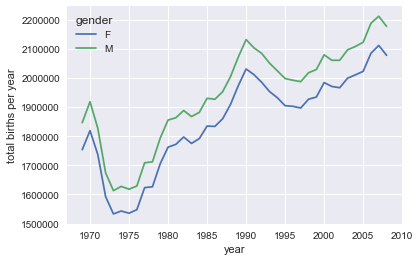

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

With a simple pivot table and plot() method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.

Further data exploration
Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point. We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:

In [131]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution (You can learn more about sigma-clipping operations in a book I coauthored with Željko Ivezić, Andrew J. Connolly, and Alexander Gray: "Statistics, Data Mining, and Machine Learning in Astronomy" (Princeton University Press, 2014)).

With this we can use the query() method (discussed further in High-Performance Pandas: eval() and query()) to filter-out rows with births outside these values:

In [132]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Next we set the day column to integers; previously it had been a string because some columns in the dataset contained the value 'null':

In [133]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

Finally, we can combine the day, month, and year to create a Date index (see Working with Time Series). This allows us to quickly compute the weekday corresponding to each row:

In [135]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

Using this we can plot births by weekday for several decades:

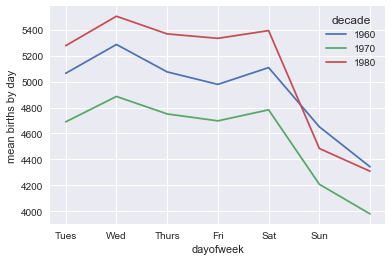

In [136]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the year. Let's first group the data by month and day separately:

In [137]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

The result is a multi-index over months and days. To make this easily plottable, let's turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [138]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends:

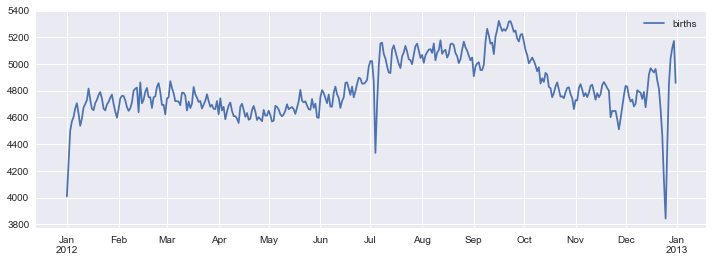

In [139]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In particular, the striking feature of this graph is the dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day) although this likely reflects trends in scheduled/induced births rather than some deep psychosomatic effect on natural births. For more discussion on this trend, see the analysis and links in Andrew Gelman's blog post on the subject. We'll return to this figure in Example:-Effect-of-Holidays-on-US-Births, where we will use Matplotlib's tools to annotate this plot.

Looking at this short example, you can see that many of the Python and Pandas tools we've seen to this point can be combined and used to gain insight from a variety of datasets. We will see some more sophisticated applications of these data manipulations in future sections!

Vectorized String Operations
< Pivot Tables | Contents | Working with Time Series >

One strength of Python is its relative ease in handling and manipulating string data. Pandas builds on this and provides a comprehensive set of vectorized string operations that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data. In this section, we'll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.

Introducing Pandas String Operations
We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [140]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This vectorization of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done. For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax:

In [141]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

This is perhaps sufficient to work with some data, but it will break if there are any missing values. For example:

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the str attribute of Pandas Series and Index objects containing strings. So, for example, suppose we create a Pandas Series with this data:

In [142]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [143]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

Using tab completion on this str attribute will list all the vectorized string methods available to Pandas.

Tables of Pandas String Methods
If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties. The examples in this section use the following series of names:

In [144]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:

len()	lower()	translate()	islower()
ljust()	upper()	startswith()	isupper()
rjust()	find()	endswith()	isnumeric()
center()	rfind()	isalnum()	isdecimal()
zfill()	index()	isalpha()	split()
strip()	rindex()	isdigit()	rsplit()
rstrip()	capitalize()	isspace()	partition()
lstrip()	swapcase()	istitle()	rpartition()
Notice that these have various return values. Some, like lower(), return a series of strings:

In [145]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [146]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [148]:
monte[monte.str.startswith('T')]

2    Terry Gilliam
4      Terry Jones
dtype: object

In [149]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

We'll see further manipulations of this kind of series-of-lists object as we continue our discussion.

Methods using regular expressions
In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in re module:

Method	Description
match()	Call re.match() on each element, returning a boolean.
extract()	Call re.match() on each element, returning matched groups as strings.
findall()	Call re.findall() on each element
replace()	Replace occurrences of pattern with some other string
contains()	Call re.search() on each element, returning a boolean
count()	Count occurrences of pattern
split()	Equivalent to str.split(), but accepts regexps
rsplit()	Equivalent to str.rsplit(), but accepts regexps

With these, you can do a wide range of interesting operations. For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [150]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the start-of-string (^) and end-of-string ($) regular expression characters:

In [151]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

Method	Description
get()	Index each element
slice()	Slice each element
slice_replace()	Replace slice in each element with passed value
cat()	Concatenate strings
repeat()	Repeat values
normalize()	Return Unicode form of string
pad()	Add whitespace to left, right, or both sides of strings
wrap()	Split long strings into lines with length less than a given width
join()	Join strings in each element of the Series with passed separator
get_dummies()	extract dummy variables as a dataframe

Vectorized item access and slicing
The get() and slice() operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3). Note that this behavior is also available through Python's normal indexing syntax–for example, df.str.slice(0, 3) is equivalent to df.str[0:3]:

In [152]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via df.str.get(i) and df.str[i] is likewise similar.

These get() and slice() methods also let you access elements of arrays returned by split(). For example, to extract the last name of each entry, we can combine split() and get():

In [154]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

Indicator variables
Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [156]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


The get_dummies() routine lets you quickly split-out these indicator variables into a DataFrame:

In [157]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


With these operations as building blocks, you can construct an endless range of string processing procedures when cleaning your data.

We won't dive further into these methods here, but I encourage you to read through "Working with Text Data" in the Pandas online documentation, or to refer to the resources listed in Further Resources.

Example: Recipe Database
These vectorized string operations become most useful in the process of cleaning up messy, real-world data. Here I'll walk through an example of that, using an open recipe database compiled from various sources on the Web. Our goal will be to parse the recipe data into ingredient lists, so we can quickly find a recipe based on some ingredients we have on hand.

The scripts used to compile this can be found at https://github.com/fictivekin/openrecipes, and the link to the current version of the database is found there as well.

As of Spring 2016, this database is about 30 MB, and can be downloaded and unzipped with these commands:

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np